In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/emtechinstitute/data-science-proyecto2/master/synergy_logistics_database.csv"
data = pd.read_csv(url)

In [3]:
#Se exploran los datos
data.head()

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
0,1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
1,2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
2,3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
3,4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
4,5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


In [4]:
data.nunique()

register_id       19056
direction             2
origin               23
destination          34
year                  6
date                912
product              28
transport_mode        4
company_name         77
total_value         248
dtype: int64

# 1) Rutas de importación y exportación

In [5]:
def rutas_clasif(data_sets):
    """ Construye DataFrame con país origen, país destino, número de envíos, tipo de transporte y total_value acumulado para un conjunto de datos
        Input: 
            data_sets - DataFrame que contiene las columnas: origin, destination, transport_mode y total_value
        Output:
            rutas - DataFrame
    """
    #Se 
    countries_orig = data_sets['origin'].unique()
    countries_dest = data_sets['destination'].unique()
    types_transport = data_sets['transport_mode'].unique()
    
    rutas = []

    for country_orig in countries_orig:
        for country_dest in countries_dest:
            for transport in types_transport:
                rout = data_sets[(data_sets['origin']==country_orig) & (data_sets['destination']==country_dest) & (data_sets['transport_mode']==transport)]
                tot_shipments = len(rout)
                if tot_shipments>0:
                    tot_val_shipment = sum(rout['total_value'])
                    rutas.append([country_orig, country_dest, tot_shipments, transport, tot_val_shipment])
                    
    df_rutas = pd.DataFrame(rutas, columns=['origin', 'destination', 'shipments', 'transport', 'total_value_shipments'])
    return df_rutas

# Exportaciones

In [6]:
exportaciones = data[data["direction"]=="Exports"]

df_rutas_exp = rutas_clasif(exportaciones)
df_rutas_exp.head()

,origin,destination,shipments,transport,total_value_shipments
0,Japan,China,196,Sea,2550000000
1,Japan,USA,123,Air,1965040000
2,Japan,South Korea,48,Sea,927000000
3,Japan,South Korea,14,Air,299000000
4,Japan,Spain,15,Sea,368000000


## Rutas más demandadas

In [7]:
df_rutas_exp.sort_values(by=['shipments'], ascending=False).head(10)

,origin,destination,shipments,transport,total_value_shipments
78,South Korea,Vietnam,497,Sea,6877007000
61,USA,Netherlands,436,Sea,1032187000
86,Netherlands,Belgium,374,Road,3230094000
34,China,Mexico,330,Air,12250000000
7,Japan,Brazil,306,Sea,3368155000
23,Germany,France,299,Road,2902214000
75,South Korea,Japan,279,Sea,4594000000
132,Australia,Singapore,273,Sea,493000000
104,Canada,Mexico,261,Rail,8450000000
30,China,Spain,250,Air,1862000000


## Rutas más valiosas

In [8]:
df_rutas_exp.sort_values(by=['total_value_shipments'], ascending=False).head(10)

,origin,destination,shipments,transport,total_value_shipments
34,China,Mexico,330,Air,12250000000
104,Canada,Mexico,261,Rail,8450000000
78,South Korea,Vietnam,497,Sea,6877007000
94,France,United Kingdom,147,Sea,5427000000
75,South Korea,Japan,279,Sea,4594000000
28,China,South Korea,144,Rail,4535000000
52,USA,Mexico,178,Rail,4370000000
96,France,Belgium,105,Road,4257000000
33,China,Germany,142,Air,4090000000
27,China,USA,111,Air,3797000000


## Resultados gráficos

In [9]:
# Build your graph
G=nx.from_pandas_edgelist(df_rutas_exp, 'origin', 'destination', create_using=nx.Graph() )

In [10]:
dealings = list(G.edges())

tot_deals = []
tot_values = []
for i in range(len(dealings)):
    country1 = dealings[i][0]
    country2 = dealings[i][1]
    info = df_rutas_exp[((df_rutas_exp['origin']==country1) & (df_rutas_exp['destination']==country2)) | ((df_rutas_exp['origin']==country2) & (df_rutas_exp['destination']==country1))]
    tot_deals.append(sum(info['shipments']))
    tot_values.append(sum(info['total_value_shipments']))
    
a, b = min(tot_deals), max(tot_deals)
t0, tf = 0, 10
tot_deals = np.asarray(tot_deals)

new_tot = (tot_deals-a)/(b-a)*tf + t0

Text(0.5,1,'Exportaciones, países según el valor de importaciones')

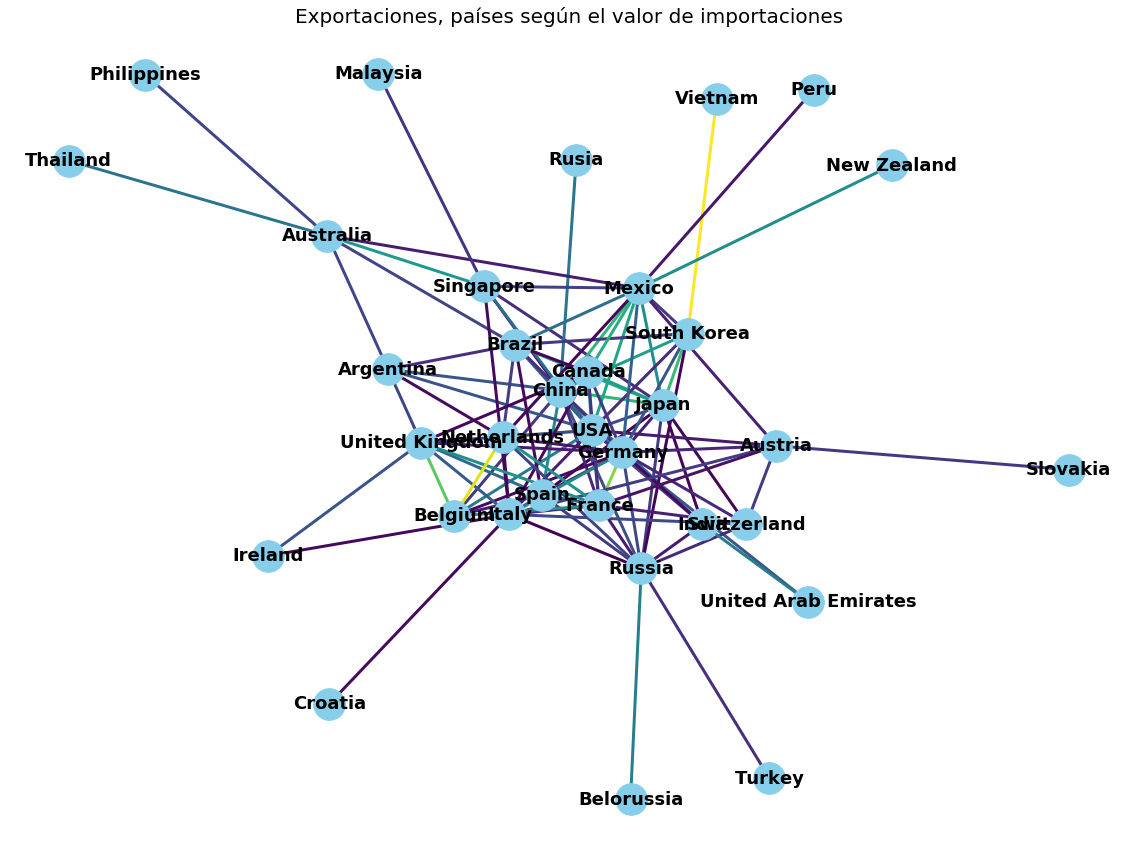

In [11]:
fig, ax = plt.subplots(figsize = (20, 15))
# Set background color

# Set color map
cmap = matplotlib.colors.ListedColormap('jet')

nx.draw_spring(G, with_labels=True, node_size=1000, node_color='skyblue', width=3, edge_color=new_tot, cmap=cmap, 
               font_size=18, font_weight="bold")


plt.title('Exportaciones, países según el valor de importaciones', fontsize=20)

# Importaciones

In [12]:
importaciones = data[data["direction"]=="Imports"]

df_rutas_imp = rutas_clasif(importaciones)
df_rutas_imp.head()

,origin,destination,shipments,transport,total_value_shipments
0,Mexico,USA,93,Rail,2060000000
1,Mexico,USA,29,Road,305000000
2,Mexico,Germany,34,Sea,345000000
3,Mexico,Japan,65,Sea,1143000000
4,Mexico,Canada,45,Sea,178000000


## Rutas más demandadas

In [13]:
df_rutas_imp.sort_values(by=['shipments'], ascending=False).head(10)

,origin,destination,shipments,transport,total_value_shipments
42,Singapore,Thailand,273,Sea,4017000000
36,Germany,China,233,Sea,1328000000
19,China,Japan,210,Air,3237000000
8,Japan,Mexico,206,Sea,3918000000
41,Malaysia,Thailand,195,Rail,3482000000
18,China,Thailand,145,Road,2786000000
31,Spain,Germany,142,Road,2044000000
16,China,United Arab Emirates,114,Sea,3357000000
50,Brazil,China,113,Sea,413000000
26,USA,Thailand,109,Sea,1568000000


## Rutas más valiosas

In [14]:
df_rutas_imp.sort_values(by=['total_value_shipments'], ascending=False).head(10)

,origin,destination,shipments,transport,total_value_shipments
42,Singapore,Thailand,273,Sea,4017000000
8,Japan,Mexico,206,Sea,3918000000
41,Malaysia,Thailand,195,Rail,3482000000
16,China,United Arab Emirates,114,Sea,3357000000
19,China,Japan,210,Air,3237000000
18,China,Thailand,145,Road,2786000000
9,Japan,United Arab Emirates,76,Sea,2238000000
0,Mexico,USA,93,Rail,2060000000
31,Spain,Germany,142,Road,2044000000
33,Germany,Mexico,70,Sea,1804000000


## Resultados gráficos

In [15]:
# Build your graph
G=nx.from_pandas_edgelist(df_rutas_imp, 'origin', 'destination', create_using=nx.Graph() )

In [16]:
dealings = list(G.edges())

tot_deals = []
tot_values = []
for i in range(len(dealings)):
    country1 = dealings[i][0]
    country2 = dealings[i][1]
    info = df_rutas_imp[((df_rutas_imp['origin']==country1) & (df_rutas_imp['destination']==country2)) | ((df_rutas_imp['origin']==country2) & (df_rutas_imp['destination']==country1))]
    tot_deals.append(sum(info['shipments']))
    tot_values.append(sum(info['total_value_shipments']))
    
a, b = min(tot_deals), max(tot_deals)
t0, tf = 0, 10
tot_deals = np.asarray(tot_deals)

new_tot = (tot_deals-a)/(b-a)*tf + t0

Text(0.5,1,'Importaciones, países según el valor de importaciones')

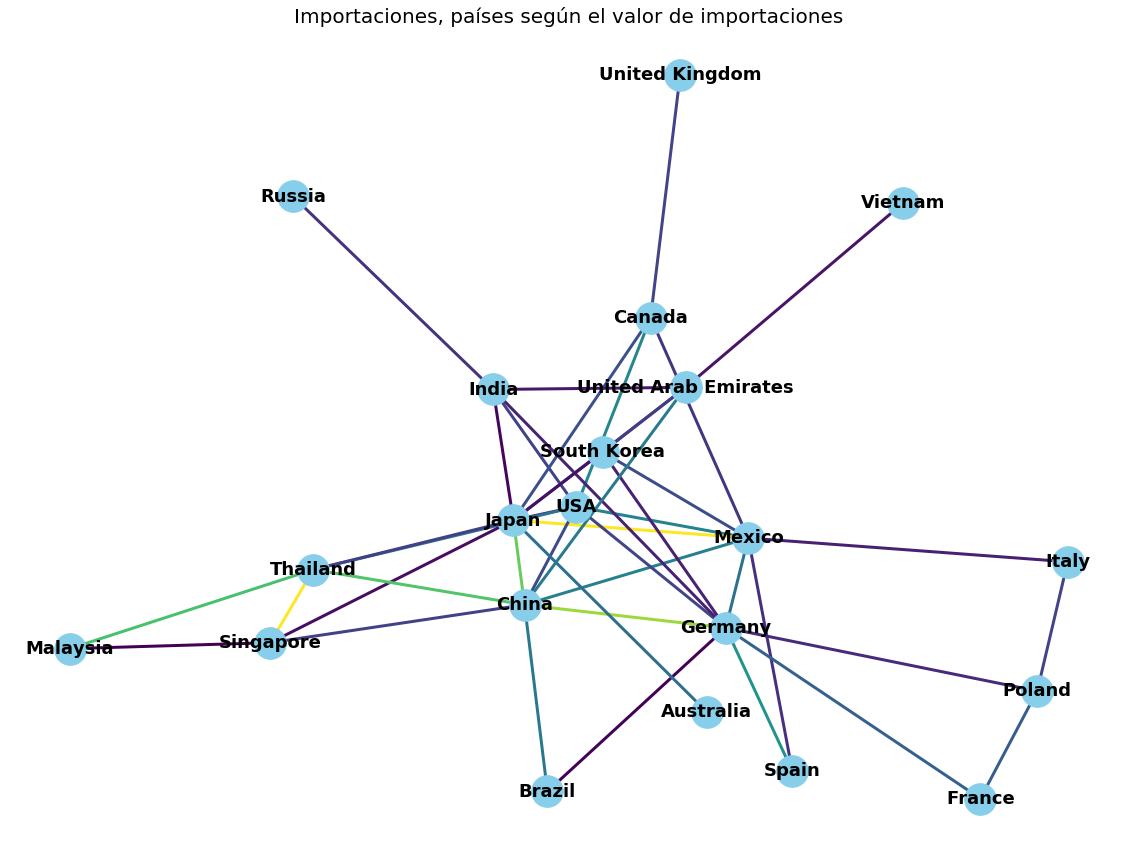

In [17]:
fig, ax = plt.subplots(figsize = (20, 15))
# Set background color

# Set color map
cmap = matplotlib.colors.ListedColormap('jet')

nx.draw_spring(G, with_labels=True, node_size=1000, node_color='skyblue', width=3, edge_color=new_tot, cmap=cmap, 
               font_size=18, font_weight="bold")


plt.title('Importaciones, países según el valor de importaciones', fontsize=20)

# 2) Medio de transporte utilizado

In [18]:
def Summary_month(data_sets, type_transport):
    """ Crea un DataFrame que contenga, por mes y por transporte: # países de origen, 
    #países de destino, # productos, # de compañias, suma de total_value
        Input: 
            data_sets - DataFrame que contiene las columnas: date, origin, destination, product, company_name, transport_mode y total_value
        Output:
            rutas - DataFrame
    """
    months_summary = []

    for i in range(len(Fechas)):
        if i==len(Fechas)-1:
            dealings = data_sets[(data_sets['date']>=Fechas[i]) & (data_sets['transport_mode']==type_transport)]
        else:
            dealings = data_sets[(data_sets['date']>=Fechas[i]) & (data_sets['date']<Fechas[i+1]) & (data_sets['transport_mode']==type_transport)]
        orig_countries = len(dealings['origin'].unique())
        dest_countries = len(dealings['destination'].unique())
        products = len(dealings['product'].unique())
        companies = len(dealings['company_name'].unique())
        tot_values = sum(dealings['total_value'])
        months_summary.append([Fechas[i], orig_countries, dest_countries, products, companies, tot_values])
    df_months_summary = pd.DataFrame(months_summary, columns=['date', 'origin', 'destination', 'products', 'companies', 'total_value'])
    
    return df_months_summary

In [19]:
def Summary_type_transport(data_sets):
    """ Crea un DataFrame que contenga, para cada tipo de transporte: # de envíos, # países que usan ese transporte, ingreso total
        Input:
            data_sets - DataFrame que contiene las columnas: transport_mode, origin, destination, total_value
        Output:
            df_info_transp - DataFrame
    """
    types_transport = data_sets['transport_mode'].unique()
    
    info_transp = []
    
    for type_transport in types_transport:
        dealings = data_sets[data_sets['transport_mode']==type_transport]
        No_envios = len(dealings)
        country_transp = data_sets[data_sets['transport_mode']==type_transport]
        orig_countries = country_transp['origin'].unique()
        dest_countries = country_transp['destination'].unique()
        countries = np.union1d(orig_countries, dest_countries)
        tot_countries = len(countries)
        tot_values = sum(country_transp['total_value'])
        info_transp.append([type_transport, No_envios, tot_countries, tot_values])
        
    df_info_transp = pd.DataFrame(info_transp, columns=["transport_mode", "tot_shipments", "tot_countries", "sum_tot_values"])
    return df_info_transp

## Exportaciones

In [20]:
exportaciones = data[data["direction"]=="Exports"]

exportaciones['date'] = pd.to_datetime(exportaciones['date'], format='%d/%m/%y')
exportaciones = exportaciones.sort_values('date')

init_date = min(exportaciones['date'])
end_date = max(exportaciones['date'])

#Se crea una lista de fechas mensuales desde la fecha inicial hasta la fecha final
Fechas = pd.date_range(init_date.replace(day=1), end_date.replace(day=1), 
              freq='12MS').strftime("%m/%Y").tolist()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
df_ms_sea = Summary_month(exportaciones, 'Sea')
df_ms_air = Summary_month(exportaciones, 'Air')
df_ms_rail = Summary_month(exportaciones, 'Rail')
df_ms_road = Summary_month(exportaciones, 'Road')

In [22]:
df_ms_sea

,date,origin,destination,products,companies,total_value
0,01/2015,15,20,17,23,8355827000
1,01/2016,15,17,18,27,13189041000
2,01/2017,12,17,13,20,10016463000
3,01/2018,11,15,14,22,10338148000
4,01/2019,13,15,13,23,9930953000
5,01/2020,13,19,10,17,13762190000


In [23]:
df_ms_air

,date,origin,destination,products,companies,total_value
0,01/2015,3,5,6,7,5493000000
1,01/2016,3,6,4,5,2915111000
2,01/2017,3,8,5,7,8777068000
3,01/2018,2,3,3,4,1076374000
4,01/2019,3,5,4,6,7544995000
5,01/2020,3,4,4,4,6978599000


In [24]:
df_ms_rail

,date,origin,destination,products,companies,total_value
0,01/2015,10,13,12,16,1957488000
1,01/2016,6,13,9,10,4260198000
2,01/2017,10,11,12,15,5108234000
3,01/2018,8,10,9,10,10146394000
4,01/2019,7,10,7,9,4522366000
5,01/2020,6,8,6,10,8510363000


In [25]:
df_ms_road

,date,origin,destination,products,companies,total_value
0,01/2015,7,6,8,9,6989077000
1,01/2016,5,4,7,8,3247088000
2,01/2017,3,3,4,4,1473000000
3,01/2018,7,10,9,9,5872062000
4,01/2019,7,10,8,11,8732171000
5,01/2020,3,3,3,4,967088000


In [26]:
df_transports = Summary_type_transport(exportaciones)
df_transports

,transport_mode,tot_shipments,tot_countries,sum_tot_values
0,Sea,8434,29,65592622000
1,Rail,2780,23,34505043000
2,Road,2149,18,27280486000
3,Air,2045,13,32785147000


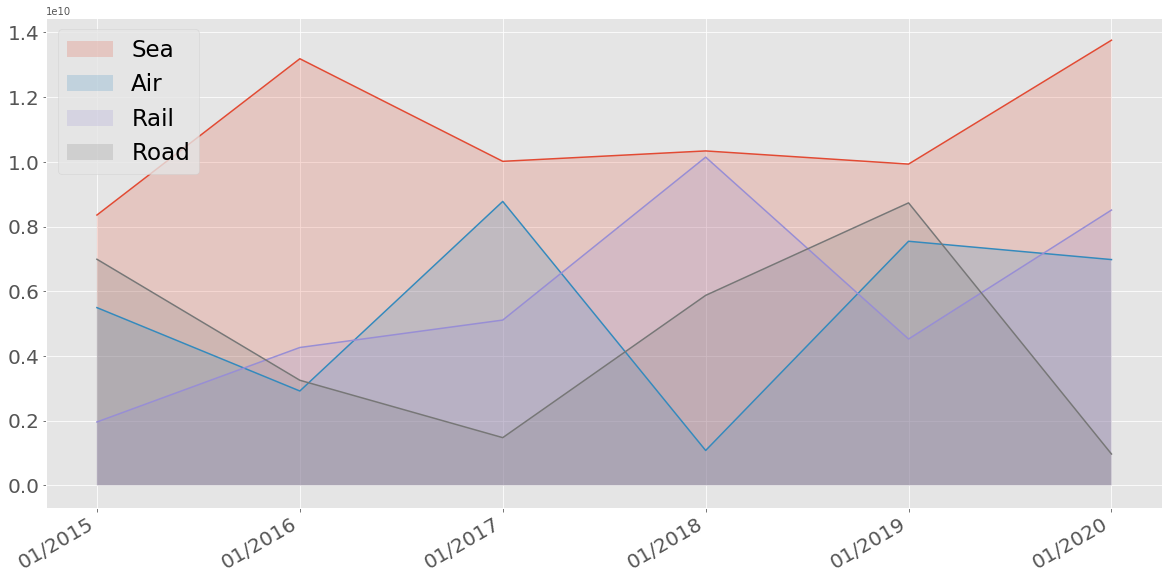

In [27]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.style.use('ggplot')
#plt.figure(figsize=(20,10))
# fig, ax1 = plt.subplots(figsize=(20,10))

plt.plot(Fechas, df_ms_sea['total_value'],  label='_nolegend_')
plt.plot(Fechas, df_ms_air['total_value'],  label='_nolegend_')
plt.plot(Fechas, df_ms_rail['total_value'],  label='_nolegend_')
plt.plot(Fechas, df_ms_road['total_value'],  label='_nolegend_')


x = range(0, 6)
plt.fill_between(x, df_ms_sea['total_value'],  label='Sea', alpha=0.2)
plt.fill_between(x, df_ms_air['total_value'],  label='Air', alpha=0.2)
plt.fill_between(x, df_ms_rail['total_value'], label='Rail', alpha=0.2)
plt.fill_between(x, df_ms_road['total_value'], label='Road', alpha=0.2)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.yscale('linear')
plt.legend(loc='best', fontsize=23)

plt.gcf().autofmt_xdate()

## Importaciones

In [28]:
importaciones = data[data["direction"]=="Imports"]

importaciones['date'] = pd.to_datetime(importaciones['date'], format='%d/%m/%y')
importaciones = importaciones.sort_values('date')

init_date = min(importaciones['date'])
end_date = max(importaciones['date'])

#Se crea una lista de fechas mensuales desde la fecha inicial hasta la fecha final
Fechas = pd.date_range(init_date.replace(day=1), end_date.replace(day=1), 
              freq='12MS').strftime("%m/%Y").tolist()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
df_ms_sea = Summary_month(importaciones, 'Sea')
df_ms_air = Summary_month(importaciones, 'Air')
df_ms_rail = Summary_month(importaciones, 'Rail')
df_ms_road = Summary_month(importaciones, 'Road')

In [30]:
df_ms_sea

,date,origin,destination,products,companies,total_value
0,01/2015,6,5,4,6,2951000000
1,01/2016,8,6,6,12,5311000000
2,01/2017,6,4,2,8,4822000000
3,01/2018,8,6,5,12,7204000000
4,01/2019,9,5,6,8,8556000000
5,01/2020,10,6,8,9,6094000000


In [31]:
df_ms_air

,date,origin,destination,products,companies,total_value
0,01/2015,3,2,2,2,1530000000
1,01/2016,2,2,2,2,544000000
2,01/2017,1,1,1,1,288000000
3,01/2018,2,1,2,2,1381000000
4,01/2019,1,1,1,1,1493000000
5,01/2020,1,1,1,1,241000000


In [32]:
df_ms_rail

,date,origin,destination,products,companies,total_value
0,01/2015,2,2,2,2,2480000000
1,01/2016,2,1,2,2,1219000000
2,01/2017,6,3,3,4,3375000000
3,01/2018,4,2,1,2,486000000
4,01/2019,1,1,1,1,162000000
5,01/2020,2,2,2,2,1401000000


In [33]:
df_ms_road

,date,origin,destination,products,companies,total_value
0,01/2015,3,2,2,3,1242000000
1,01/2016,2,2,2,3,1463000000
2,01/2017,1,1,1,1,569000000
3,01/2018,2,1,2,2,630000000
4,01/2019,0,0,0,0,0
5,01/2020,3,3,3,4,2086000000


In [34]:
df_transports = Summary_type_transport(importaciones)
df_transports

,transport_mode,tot_shipments,tot_countries,sum_tot_values
0,Rail,601,10,9123000000
1,Road,449,8,5990000000
2,Sea,2254,19,34938000000
3,Air,344,5,5477000000


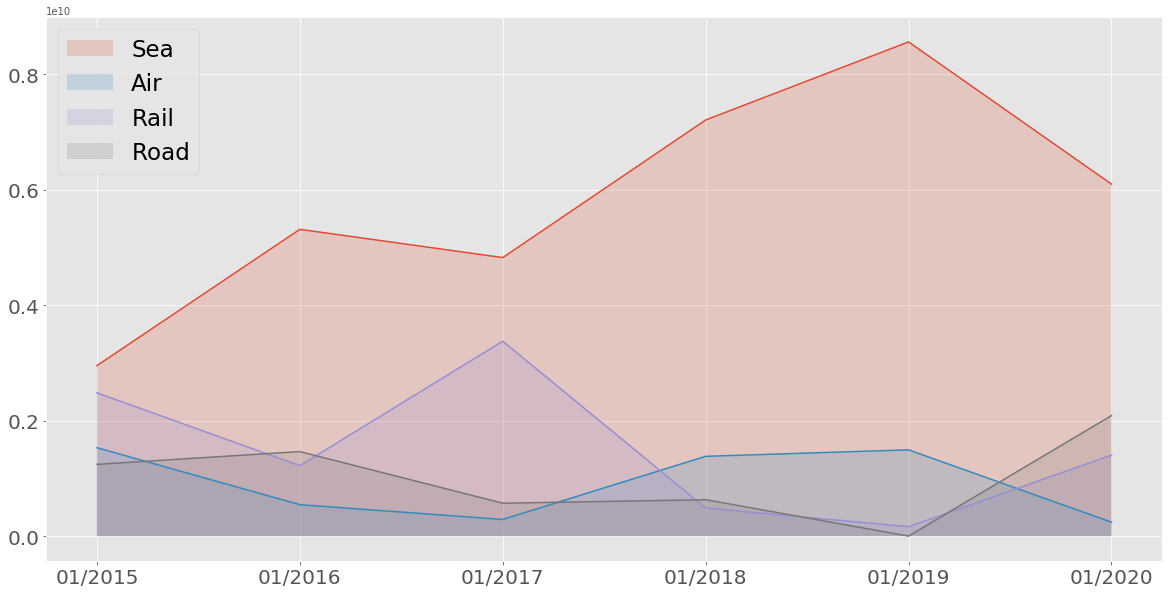

In [35]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.style.use('ggplot')
#plt.figure(figsize=(20,10))
# fig, ax1 = plt.subplots(figsize=(20,10))

plt.plot(Fechas, df_ms_sea['total_value'],  label='_nolegend_')
plt.plot(Fechas, df_ms_air['total_value'],  label='_nolegend_')
plt.plot(Fechas, df_ms_rail['total_value'],  label='_nolegend_')
plt.plot(Fechas, df_ms_road['total_value'],  label='_nolegend_')


x = range(0, 6)
plt.fill_between(x, df_ms_sea['total_value'],  label='Sea', alpha=0.2)
plt.fill_between(x, df_ms_air['total_value'],  label='Air', alpha=0.2)
plt.fill_between(x, df_ms_rail['total_value'], label='Rail', alpha=0.2)
plt.fill_between(x, df_ms_road['total_value'], label='Road', alpha=0.2)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.yscale('linear')
plt.legend(loc='best', fontsize=23)

# plt.gcf().autofmt_xdate()

# 3) Valor total de importaciones y exportaciones

In [36]:
def Summary_values_by_country(data_sets, porcentaje):
    """ Crea un DataFrame que contenga el país de origen, # de destinos, #años trabajados, 
#productos, #compañías, total de transacciones
        Input: 
            data_sets - DataFrame que contiene las columnas: origin, destination, year, product, company_name y total_value
            porcentaje - int \in[0, 1] con el que se obtendrán el número de países que generan dicho porcentaje de valor
        Output:
            df_summary_deals - DataFrame
            i - número de países que generan el porcentaje de valores indicado por 'porcentaje'
    """
    summary_deals = []
    
    orig_countries = data_sets['origin'].unique()
    for country in orig_countries:
        country_info = data_sets[data_sets['origin']==country]
        tot_ships = len(country_info)
        countries_dest = len(country_info['destination'].unique())
        init_year = min(country_info['year'])
        end_year = max(country_info['year'])
        tot_products = len(country_info['product'].unique())
        tot_companies = len(country_info['company_name'].unique())
        sum_tot_values = sum(country_info['total_value'])
        summary_deals.append([country, countries_dest, tot_ships, end_year-init_year, tot_products, tot_companies, sum_tot_values])
    
    df_summary_deals = pd.DataFrame(summary_deals, columns=['origin', 'destinations', 'tot_shipments', 'years', 'products', 'companies', 'total_dealings'])
    df_summary_deals = df_summary_deals.sort_values(by=['total_dealings'], ascending=False)
    
    
    tot_val_ships = sum(df_summary_deals['total_dealings'])
    val = porcentaje*tot_val_ships

    tot_aux = 0
    for i in range(len(df_summary_deals)):
        tot_aux+=df_summary_deals.iloc[i, 6]
        if tot_aux>=val:
            break
    
    return df_summary_deals, i+1

## Exportaciones

In [37]:
porcentaje = 0.8
country_exports, No_countries = Summary_values_by_country(exportaciones, porcentaje)
country_exports.head(No_countries)

,origin,destinations,tot_shipments,years,products,companies,total_dealings
8,China,10,1657,5,3,4,32977046000
12,France,11,919,5,2,3,18614332000
9,USA,9,1464,5,2,3,18355306000
5,South Korea,6,1134,5,2,3,14621146000
7,Russia,9,766,5,2,2,13223000000
0,Japan,11,1257,5,2,5,11948976000
3,Germany,9,1295,5,3,4,11343233000
1,Canada,6,603,5,2,2,10684000000


In [38]:
print(No_countries, '/', len(country_exports), 'países generan el', porcentaje*100, '% de total_dealings')

8 / 20 países generan el 80.0 % de total_dealings


In [39]:
data_set = country_exports

m, n = data_set.shape
idx = ['Destinos alcanzados', 'Envíos totales', 'Productos', 'Compañías', 'Ganancias']
porcentajes = []

print('\033[1m' + 'Utilidad generada por ' + str(No_countries)+'/'+str(len(data_set))+' países'+ '\033[0m')
for i in range(n-1):
    if i==3:
        continue
    val = round((sum(data_set.iloc[:No_countries, i+1])/sum(data_set.iloc[:, i+1]))*100, 2)
    porcentajes.append(val)

df_porcentajes = pd.DataFrame(porcentajes, index=idx, columns=['Porcentajes'])
df_porcentajes

Utilidad generada por 8/20 países


,Porcentajes
Destinos alcanzados,49.31
Envíos totales,59.03
Productos,47.62
Compañías,56.52
Ganancias,82.27


## Importaciones

In [40]:
porcentaje = 0.8
country_imports, No_countries = Summary_values_by_country(importaciones, porcentaje)
country_imports.head(No_countries)

,origin,destinations,tot_shipments,years,products,companies,total_dealings
1,China,6,615,5,4,6,12233000000
4,Japan,7,445,5,4,7,8094000000
5,USA,6,376,5,5,6,5291000000
0,Mexico,5,366,5,4,5,4621000000
2,Germany,4,369,5,2,4,4250000000
7,Singapore,1,273,5,1,1,4017000000
9,South Korea,4,161,5,3,4,3889000000
6,Malaysia,2,199,5,2,2,3560000000


In [41]:
print(No_countries, '/', len(country_imports), 'países generan el', porcentaje*100, '% de ganancias')

8 / 18 países generan el 80.0 % de ganancias


In [42]:
data_set = country_imports

m, n = data_set.shape
idx = ['Destinos alcanzados', 'Envíos totales', 'Productos', 'Compañías', 'Ganancias']
porcentajes = []

print('\033[1m' + 'Utilidad generado por ' + str(No_countries)+'/'+str(len(data_set))+' países'+ '\033[0m')
for i in range(n-1):
    if i==3:
        continue
    val = round((sum(data_set.iloc[:No_countries, i+1])/sum(data_set.iloc[:, i+1]))*100, 2)
    porcentajes.append(val)

df_porcentajes = pd.DataFrame(porcentajes, index=idx, columns=['Porcentajes'])
df_porcentajes

Utilidad generado por 8/18 países


,Porcentajes
Destinos alcanzados,71.43
Envíos totales,76.86
Productos,75.47
Compañías,68.63
Ganancias,82.76
